In [2]:
import json
def get_from_json(file_path):
    with open(file_path) as json_file:
        data = json.load(json_file)
    return data
result = get_from_json("./Figure/BoxPlots/Result.json")
#result = get_from_json("./Figure/BoxPlots/ResultNew1.json")

In [11]:
import csv
def create_csv(pValue,stats, feature,filename):
    data  = []
    data.append(["feature1","feature2","pvalue","stats"])
    for i, r in enumerate(feature):
        for j, r in enumerate(feature):
            data.append([str(feature[i]),str(feature[j]),pValue[i,j],stats[i,j]])
    with open(filename+".csv", 'w') as csvfile:
        csvwriter = csv.writer(csvfile, delimiter=',')
        csvwriter.writerows(data)
    
    

In [110]:
if p_value < 0.05:
    print("Reject null hypothesis, the two sets of data are significantly different.")
else: 
    print("Fail to reject null hypothesis, the two sets of data are not significantly different.")


Reject null hypothesis, the two sets of data are significantly different.


In [5]:
import matplotlib
import matplotlib as mpl
def printTest(tukey):
    conf = tukey.confidence_interval(confidence_level=.95)
    print("Comparison \t Statistic \t\t p-value \t\t Low-CI \t\t Up-CI")
    accept =[]
    reject = []
    for i in range(4):
        for j in range(4):
            if i != j:
                s = tukey.statistic[i][j]
                p = tukey.pvalue[i][j]
                l = conf.low[i][j]
                h = conf.high[i][j]
                if not((j,i) in accept):
                    if p > 0:
                        print("(%s-%s) \t %5.5f \t\t %5.5f \t\t %5.5f \t\t %5.5f" %(model_name[i],model_name[j], s, p, l, h) )
                    else:
                        reject.append((model_name[i]+"-"+model_name[j]))
                accept.append((i,j))
    print("Rejects: ", reject)
    print("======================================================================")
def heatmap(data, row_labels, col_labels, ax=None,
            cbar_kw=None, cbarlabel="", **kwargs):
    """
    Create a heatmap from a numpy array and two lists of labels.

    Parameters
    ----------
    data
        A 2D numpy array of shape (M, N).
    row_labels
        A list or array of length M with the labels for the rows.
    col_labels
        A list or array of length N with the labels for the columns.
    ax
        A `matplotlib.axes.Axes` instance to which the heatmap is plotted.  If
        not provided, use current axes or create a new one.  Optional.
    cbar_kw
        A dictionary with arguments to `matplotlib.Figure.colorbar`.  Optional.
    cbarlabel
        The label for the colorbar.  Optional.
    **kwargs
        All other arguments are forwarded to `imshow`.
    """

    if ax is None:
        ax = plt.gca()

    if cbar_kw is None:
        cbar_kw = {}

    # Plot the heatmap
    im = ax.imshow(data, **kwargs)
    # Create colorbar
    cbar = ax.figure.colorbar(im, ax=ax, **cbar_kw)
    cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")
    

    # Show all ticks and label them with the respective list entries.
    ax.set_xticks(np.arange(data.shape[1]), labels=col_labels)
    ax.set_yticks(np.arange(data.shape[0]), labels=row_labels)

    # Let the horizontal axes labeling appear on top.
    ax.tick_params(top=True, bottom=False,
                   labeltop=True, labelbottom=False)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=-30, ha="right",
             rotation_mode="anchor")

    # Turn spines off and create white grid.
    ax.spines[:].set_visible(False)

    ax.set_xticks(np.arange(data.shape[1]+1)-.5, minor=True)
    ax.set_yticks(np.arange(data.shape[0]+1)-.5, minor=True)
    ax.grid(which="minor", color="w", linestyle='-', linewidth=3)
    ax.tick_params(which="minor", bottom=False, left=False)

    return im, cbar


def annotate_heatmap(im, data=None, valfmt="{x:.2f}",
                     textcolors=("black", "white"),
                     threshold=None, **textkw):
    """
    A function to annotate a heatmap.

    Parameters
    ----------
    im
        The AxesImage to be labeled.
    data
        Data used to annotate.  If None, the image's data is used.  Optional.
    valfmt
        The format of the annotations inside the heatmap.  This should either
        use the string format method, e.g. "$ {x:.2f}", or be a
        `matplotlib.ticker.Formatter`.  Optional.
    textcolors
        A pair of colors.  The first is used for values below a threshold,
        the second for those above.  Optional.
    threshold
        Value in data units according to which the colors from textcolors are
        applied.  If None (the default) uses the middle of the colormap as
        separation.  Optional.
    **kwargs
        All other arguments are forwarded to each call to `text` used to create
        the text labels.
    """

    if not isinstance(data, (list, np.ndarray)):
        data = im.get_array()

    # Normalize the threshold to the images color range.
    if threshold is not None:
        threshold = im.norm(threshold)
    else:
        threshold = im.norm(data.max())/2.

    # Set default alignment to center, but allow it to be
    # overwritten by textkw.
    kw = dict(horizontalalignment="center",
              verticalalignment="center")
    kw.update(textkw)

    # Get the formatter in case a string is supplied
    if isinstance(valfmt, str):
        valfmt = matplotlib.ticker.StrMethodFormatter(valfmt)

    # Loop over the data and create a `Text` for each "pixel".
    # Change the text's color depending on the data.
    texts = []
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            kw.update(color=textcolors[int(im.norm(data[i, j]) > threshold)])
            text = im.axes.text(j, i, valfmt(data[i, j], None), **kw)
            texts.append(text)

    return texts

## Largest Connected Components

In [3]:
import numpy as np
from scipy.stats import f_oneway, tukey_hsd
import matplotlib.pyplot as plt
def printTest(tukey):
    conf = tukey.confidence_interval(confidence_level=.95)
    print("Comparison \t Statistic \t\t p-value \t\t Low-CI \t\t Up-CI")
    accept =[]
    reject = []
    for i in range(4):
        for j in range(4):
            if i != j:
                s = tukey.statistic[i][j]
                p = tukey.pvalue[i][j]
                l = conf.low[i][j]
                h = conf.high[i][j]
                if not((j,i) in accept):
                    if p > 0:
                        print("(%s-%s) \t %5.5f \t\t %5.5f \t\t %5.5f \t\t %5.5f" %(model_name[i],model_name[j], s, p, l, h) )
                    else:
                        reject.append((model_name[i]+"-"+model_name[j]))
                accept.append((i,j))
    print("Rejects: ", reject)
    print("======================================================================")
model_name = ['best','ba','mix', 'finder','ci']
model = ['ba','mix', 'finder','ci']
model_name = ['ba', 'mix', 'finder', 'ci','gdm','corehd']
#The null hypothesis is that each group has the same mean.
#for graphType in ['result_Syn','result_SynMotif' ]:
for graphType in ['result_SynMotif' ]:
    for evalType in result["ba"][graphType]:
        for graph in result['ba'][graphType][evalType]:
            print("Evaluating %s for evaluation type %s for %s graph type"%(graphType,evalType,graph))
            print()
            ba = result['ba'][graphType][evalType][graph]['auc'] 
            mix = result['mix'][graphType][evalType][graph]['auc']
            finder = result['finder'][graphType][evalType][graph]['auc']
            ci = result['ci'][graphType][evalType][graph]['auc']
            gdm = result['gdm'][graphType][evalType][graph]['auc']
            corehd = result['corehd'][graphType][evalType][graph]['auc']
            print(len(ba), len(mix), len(finder), len(ci), len(gdm), len(corehd))
            tukey_results = tukey_hsd(ba, mix, finder, ci, gdm, corehd)
            #printTest(tukey_results)
            harvest = tukey_results.statistic
            fig, ax = plt.subplots()
            im, cbar = heatmap(harvest, model_name, model_name, ax=ax,
                               cmap='coolwarm', cbarlabel="Difference in Mean")
            texts = annotate_heatmap(im, valfmt="{x:.3f}")
            fig.tight_layout()
            plt.savefig("./Figure/BoxPlots/HeatMap/pvalue/"+"MinMax"+"_"+evalType+"_"+graph+".png")
            plt.show()



KeyboardInterrupt



## MaxNum Maximize Number of Connected Components

In [ ]:
import numpy as np
from scipy.stats import f_oneway, tukey_hsd
import matplotlib.pyplot as plt
model = ['ba','mix','ci','corehd']
model_name = ['ba', 'mix', 'ci','corehd']
#The null hypothesis is that each group has the same mean.
#for graphType in ['result_Syn','result_SynMotif' ]:
for graphType in ['result_SynMotif' ]:
    for evalType in result["ba"][graphType]:
        for graph in result['ba'][graphType][evalType]:
            print("Evaluating %s for evaluation type %s for %s graph type"%(graphType,evalType,graph))
            print()
            ba = result['ba_MaxNum'][graphType][evalType][graph]['auc'] 
            mix = result['mix_MaxNum'][graphType][evalType][graph]['auc']
            ci = result['ci_MaxNum'][graphType][evalType][graph]['auc']
            corehd = result['corehd_MaxNum'][graphType][evalType][graph]['auc']
            tukey_results = tukey_hsd(ba, mix, ci, corehd)
            harvest = tukey_results.pvalue
            fig, ax = plt.subplots()
            im, cbar = heatmap(harvest, model_name, model_name, ax=ax,
                               cmap='coolwarm', cbarlabel="Difference in Mean")
            texts = annotate_heatmap(im, valfmt="{x:.3f}")
            fig.tight_layout()
            plt.savefig("./Figure/BoxPlots/HeatMap/pvalue/"+"MaxNum"+"_"+evalType+"_"+graph+".png")
            plt.show()


## Pairwise Connectivity

Evaluating result_SynMotif for evaluation type BA for cycle graph type



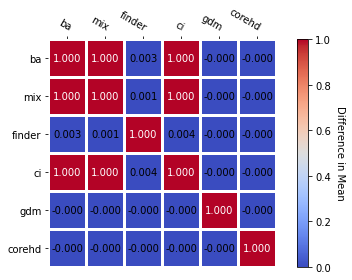

Evaluating result_SynMotif for evaluation type BA for clique graph type



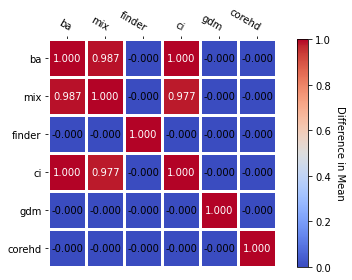

Evaluating result_SynMotif for evaluation type BA for house graph type



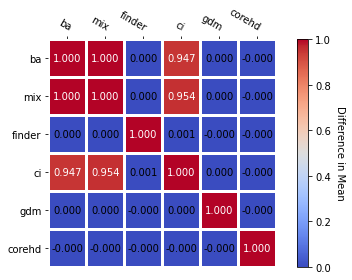

Evaluating result_SynMotif for evaluation type BA for grid graph type



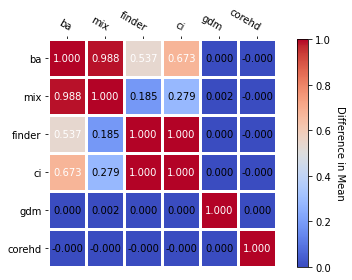

Evaluating result_SynMotif for evaluation type BA for star graph type



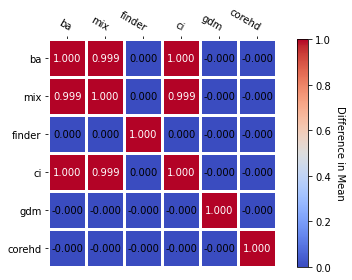

Evaluating result_SynMotif for evaluation type BA for fan graph type



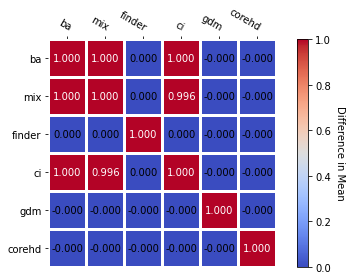

Evaluating result_SynMotif for evaluation type BA for diamond graph type



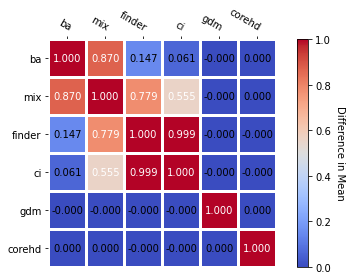

Evaluating result_SynMotif for evaluation type Tree for cycle graph type



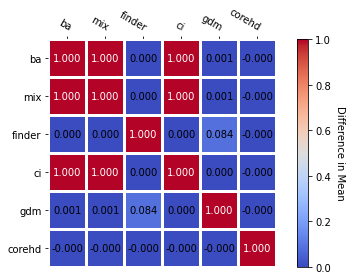

Evaluating result_SynMotif for evaluation type Tree for clique graph type



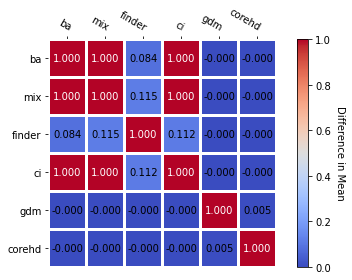

Evaluating result_SynMotif for evaluation type Tree for house graph type



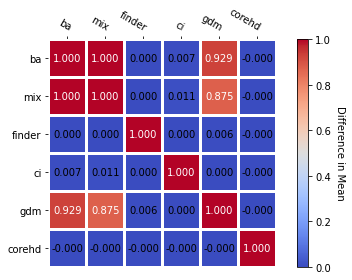

Evaluating result_SynMotif for evaluation type Tree for grid graph type



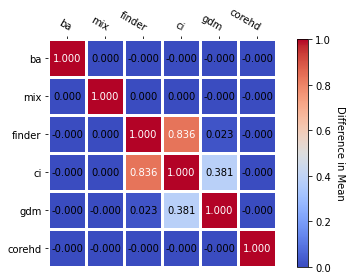

Evaluating result_SynMotif for evaluation type Tree for star graph type



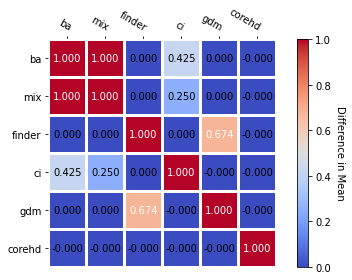

Evaluating result_SynMotif for evaluation type Tree for fan graph type



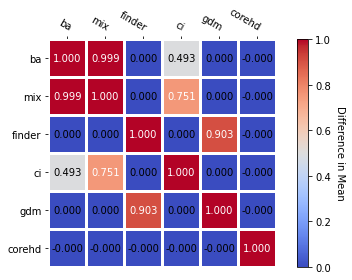

Evaluating result_SynMotif for evaluation type Tree for diamond graph type



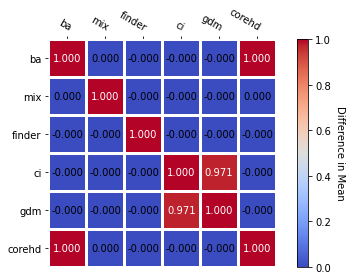

In [5]:
import numpy as np
from scipy.stats import f_oneway, tukey_hsd
import matplotlib.pyplot as plt
model_name = ['best','ba','mix', 'finder','ci']
model = ['ba_CN','mix_CN', 'finder_CN','ci_CN']
model_name = ['ba','mix', 'finder','ci','gdm','corehd']
#The null hypothesis is that each group has the same mean.
#for graphType in ['result_Syn','result_SynMotif' ]:
for graphType in ['result_SynMotif']:
    for evalType in result["ba"][graphType]:
        for graph in result['ba'][graphType][evalType]:
            print("Evaluating %s for evaluation type %s for %s graph type"%(graphType,evalType,graph))
            print()
            ba = result['ba_CN'][graphType][evalType][graph]['auc'] 
            mix = result['mix_CN'][graphType][evalType][graph]['auc']
            finder = result['finder_CN'][graphType][evalType][graph]['auc']
            ci = result['ci_CN'][graphType][evalType][graph]['auc']
            gdm = result['gdm_CN'][graphType][evalType][graph]['auc']
            corehd = result['corehd_CN'][graphType][evalType][graph]['auc']
            tukey_results = tukey_hsd(ba, mix, finder, ci, gdm, corehd)
            harvest = tukey_results.pvalue
            fig, ax = plt.subplots()
            im, cbar = heatmap(harvest, model_name, model_name, ax=ax,
                               cmap='coolwarm', cbarlabel="Difference in Mean")
            texts = annotate_heatmap(im, valfmt="{x:.3f}")
            fig.tight_layout()
            plt.savefig("./Figure/BoxPlots/HeatMap/pvalue/"+"CNP"+"_"+evalType+"_"+graph+".pdf")
            plt.show()


# FEATURE

## BA

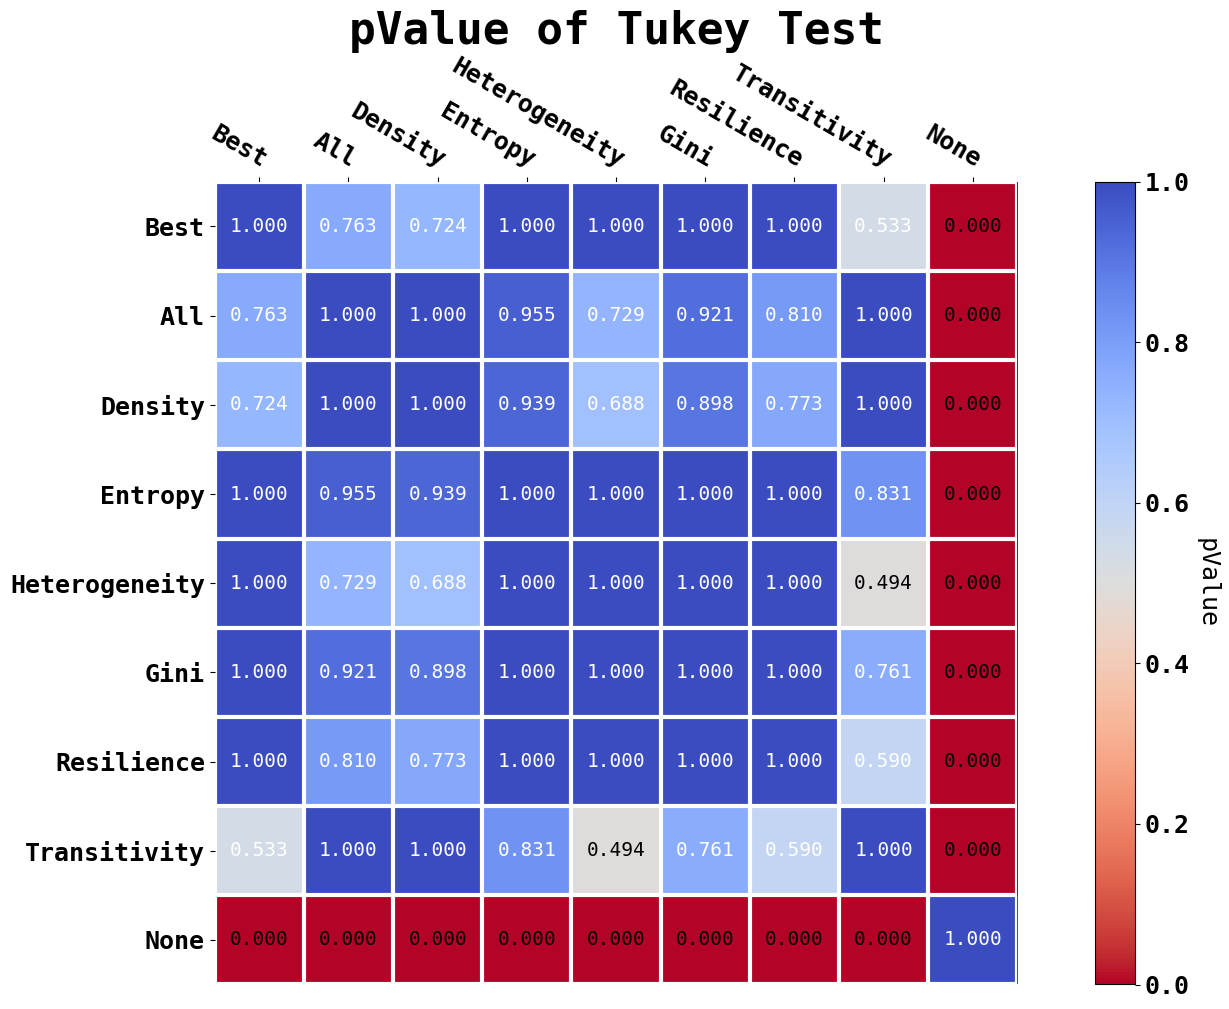

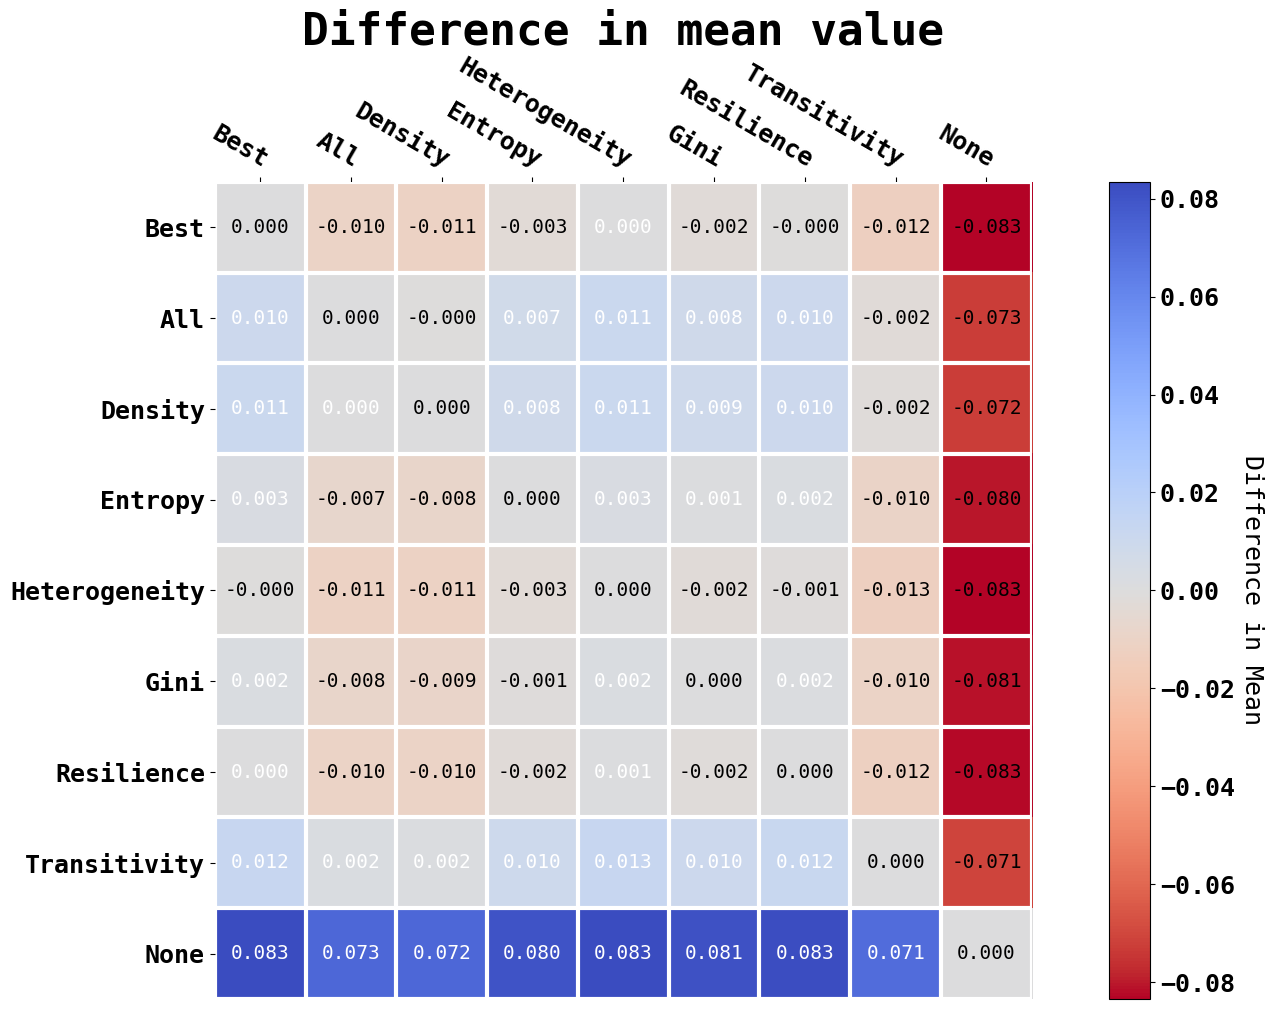

In [12]:
import numpy as np
from scipy.stats import f_oneway, tukey_hsd
import matplotlib.pyplot as plt

model_name = ['best','ba','mix', 'finder','ci']
#model = ['ba','mix', 'finder','ci']
model_name = ["Best",'All_ba', 'Density_ba', 'Entropy_ba', 'Heterogeneity_ba','Gini_ba','Resilience_ba', 'Transitivity_ba', 'None_ba']
#The null hypothesis is that each group has the same mean.
ba, All, Density, Entropy, Heterogeneity, Gini, Resilience, Transitivity, none = [],[],[],[],[],[],[],[],[]
for graphType in ['result_Syn' ]:
    for evalType in result["ba"][graphType]:
        for graph in result['ba'][graphType][evalType]:
            ba += result['ba'][graphType][evalType][graph]['auc'] 
            All += result['All_ba'][graphType][evalType][graph]['auc'] 
            Density += result['Density_ba'][graphType][evalType][graph]['auc'] 
            Entropy += result['Entropy_ba'][graphType][evalType][graph]['auc'] 
            Heterogeneity += result['Heterogeneity_ba'][graphType][evalType][graph]['auc'] 
            Gini += result['Gini_ba'][graphType][evalType][graph]['auc'] 
            Resilience += result['Resilience_ba'][graphType][evalType][graph]['auc'] 
            Transitivity += result['Transitivity_ba'][graphType][evalType][graph]['auc'] 
            none += result['None_ba'][graphType][evalType][graph]['auc'] 
    tukey_results = tukey_hsd(ba, All, Density, Entropy, Heterogeneity, Gini, Resilience, Transitivity, none)
    #printTest(tukey_results)
    harvest_pvalue = tukey_results.pvalue
    harvest_stats = tukey_results.statistic
    filename= "./Figure/BoxPlots/HeatMap/HeatMap_BA"
    model_name = [m.split("_")[0] for m in model_name]
    create_csv(harvest_pvalue,harvest_stats, model_name,filename)
    font = {
        'family' : 'monospace',
        'weight' : 'bold',
        'size'   : 18}
    matplotlib.rc('font', **font)
    #fig, ax = plt.subplots(figsize=(28, 8), dpi=100, constrained_layout=True, gridspec_kw={'wspace':0.1,'hspace':1.0})
    fig, ax = plt.subplots(figsize=(16, 10), dpi=100)
    harvest = tukey_results.pvalue
    model_name = [m.split("_")[0] for m in model_name]
    im, cbar = heatmap(harvest, model_name, model_name, ax=ax,
                       cmap='coolwarm_r', cbarlabel="pValue")
    texts = annotate_heatmap(im, valfmt="{x:.3f}",fontsize = 14,fontweight ='normal')
    fig.tight_layout()
    plt.title("pValue of Tukey Test", fontsize=32, fontweight ='bold')
    plt.savefig("./Figure/BoxPlots/HeatMap/MinMax_BA_pValue.png", bbox_inches='tight', pad_inches=0.1)
    plt.show()
    fig, ax = plt.subplots(figsize=(16, 10), dpi=100)
    harvest = tukey_results.statistic
    model_name = [m.split("_")[0] for m in model_name]
    im, cbar = heatmap(harvest, model_name, model_name, ax=ax,
                       cmap='coolwarm_r', cbarlabel="Difference in Mean")
    texts = annotate_heatmap(im, valfmt="{x:.3f}",fontsize = 14, fontweight ='normal')
    fig.tight_layout()
    plt.title("Difference in mean value", fontsize=32, fontweight ='bold')
    plt.savefig("./Figure/BoxPlots/HeatMap/MinMax_BA_mean.png", bbox_inches='tight', pad_inches=0.1)
    plt.show()



## ER

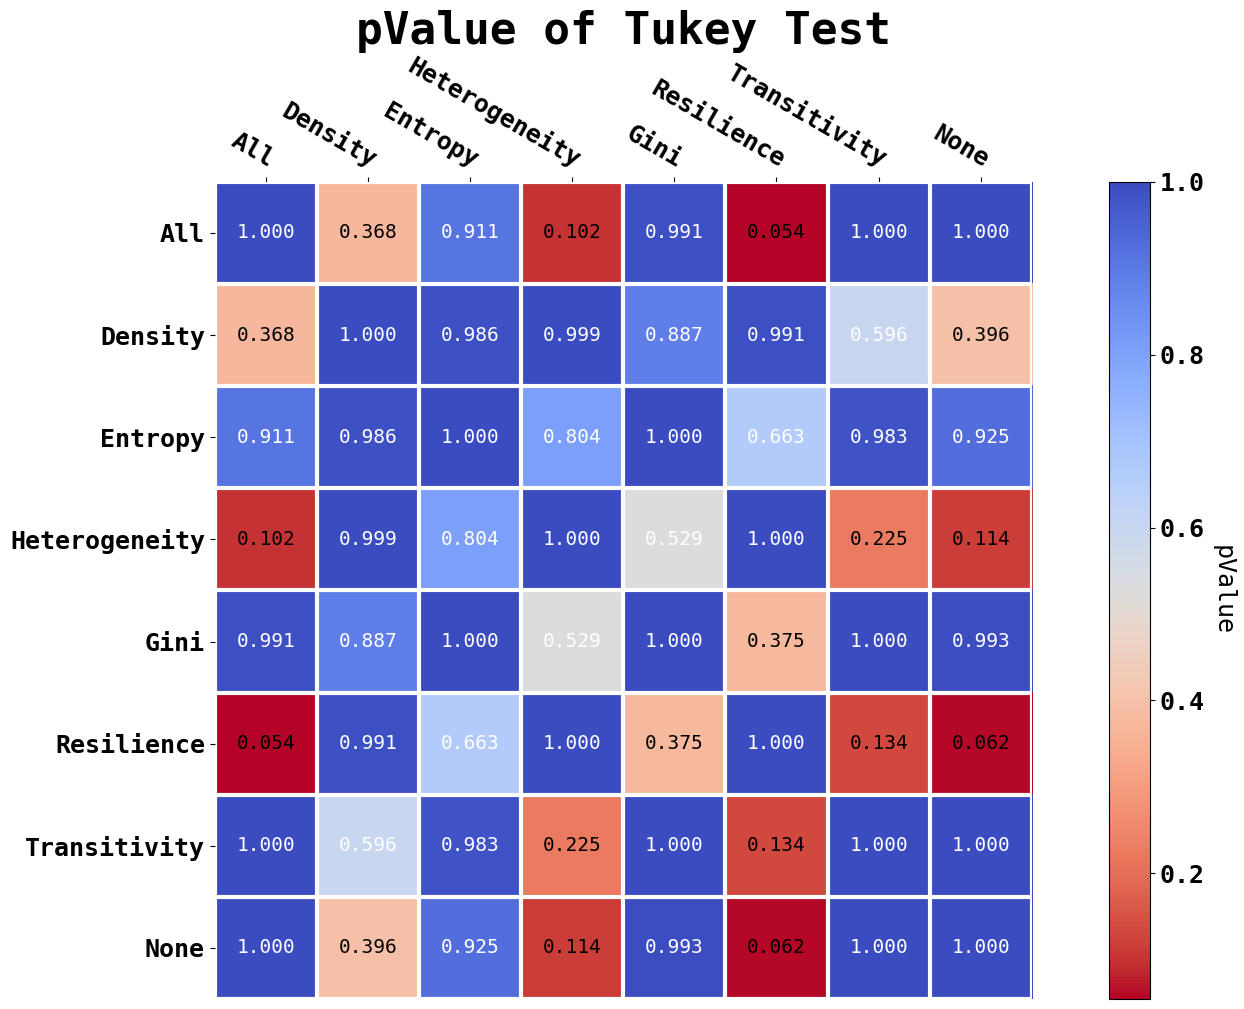

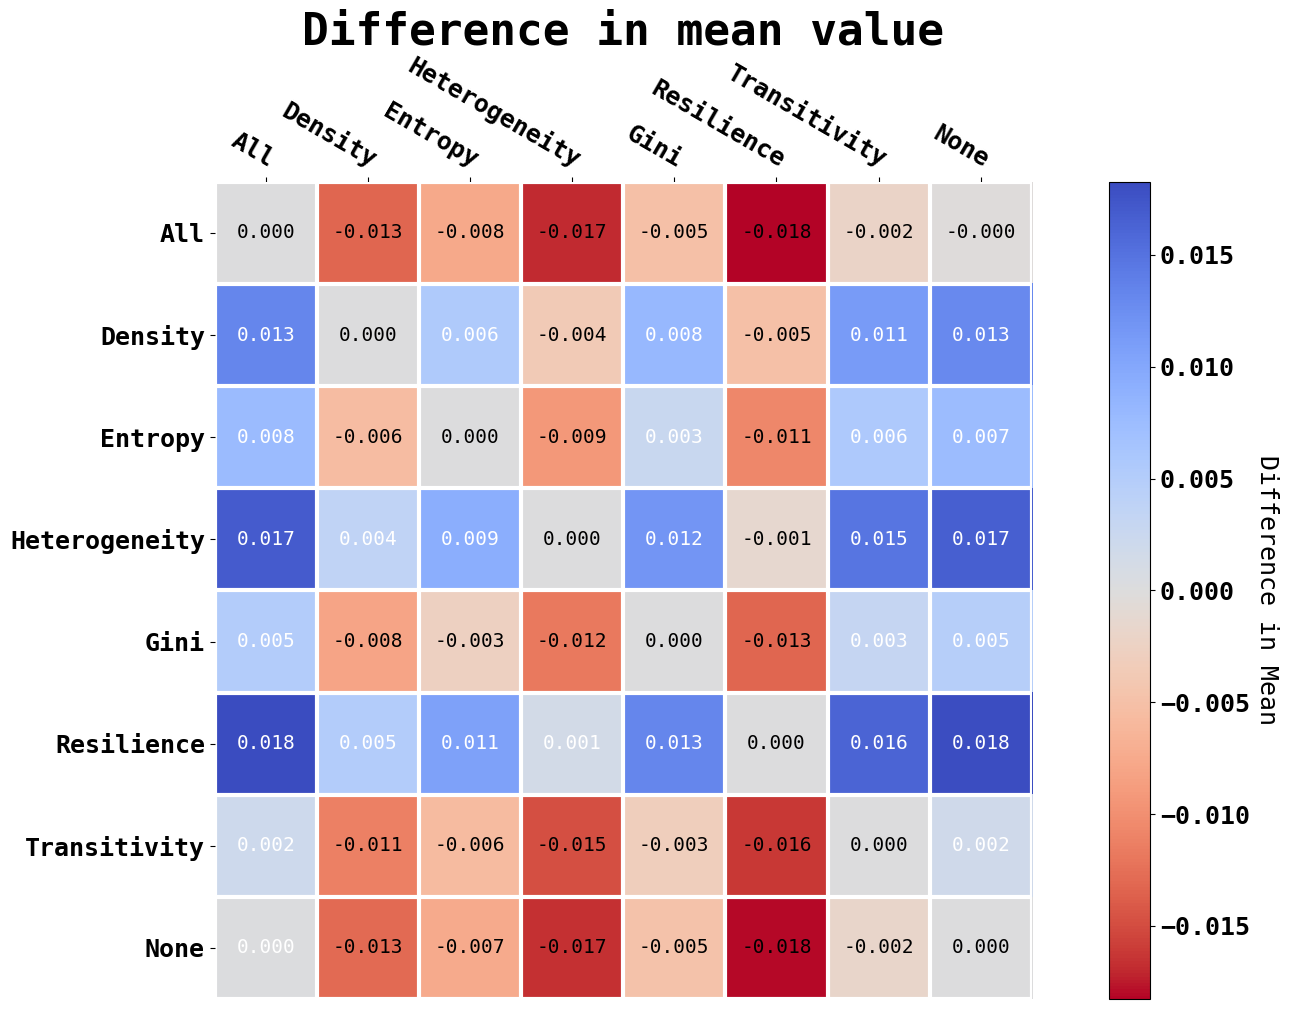

In [13]:
import numpy as np
from scipy.stats import f_oneway, tukey_hsd
import matplotlib.pyplot as plt 
#model = ['ba','mix', 'finder','ci']
model_name = ['All', 'Density_er', 'Entropy_er', 'Heterogeneity_er','Gini_er','Resilience_er', 'Transitivity_er', 'None_er']
#The null hypothesis is that each group has the same mean.
All, Density, Entropy, Heterogeneity, Gini, Resilience, Transitivity, none = [],[],[],[],[],[],[],[]
for graphType in ['result_Syn' ]:
    for evalType in result["er"][graphType]:
        for graph in result['er'][graphType][evalType]:
            All += result['er'][graphType][evalType][graph]['auc'] 
            Density += result['Density_er'][graphType][evalType][graph]['auc'] 
            Entropy += result['Entropy_er'][graphType][evalType][graph]['auc'] 
            Heterogeneity += result['Heterogeneity_er'][graphType][evalType][graph]['auc'] 
            Gini += result['Gini_er'][graphType][evalType][graph]['auc'] 
            Resilience += result['Resilience_er'][graphType][evalType][graph]['auc'] 
            Transitivity += result['Transitivity_er'][graphType][evalType][graph]['auc'] 
            none += result['None_er'][graphType][evalType][graph]['auc'] 
    tukey_results = tukey_hsd(All, Density, Entropy, Heterogeneity, Gini, Resilience, Transitivity, none)
    #printTest(tukey_results)
    #harvest = tukey_results.statistic
    harvest_pvalue = tukey_results.pvalue
    harvest_stats = tukey_results.statistic
    filename= "./Figure/BoxPlots/HeatMap/HeatMap_ER"
    model_name = [m.split("_")[0] for m in model_name]
    create_csv(harvest_pvalue,harvest_stats, model_name,filename)
    fig, ax = plt.subplots(figsize=(16, 10), dpi=100)
    harvest = tukey_results.pvalue
    model_name = [m.split("_")[0] for m in model_name]
    im, cbar = heatmap(harvest, model_name, model_name, ax=ax,
                       cmap='coolwarm_r', cbarlabel="pValue")
    texts = annotate_heatmap(im, valfmt="{x:.3f}",fontsize = 14,fontweight ='normal')
    fig.tight_layout()
    plt.title("pValue of Tukey Test", fontsize=32, fontweight ='bold')
    plt.savefig("./Figure/BoxPlots/HeatMap/MinMax_ER_pValue.png", bbox_inches='tight', pad_inches=0.1)
    plt.show()
    fig, ax = plt.subplots(figsize=(16, 10), dpi=100)
    harvest = tukey_results.statistic
    model_name = [m.split("_")[0] for m in model_name]
    im, cbar = heatmap(harvest, model_name, model_name, ax=ax,
                       cmap='coolwarm_r', cbarlabel="Difference in Mean")
    texts = annotate_heatmap(im, valfmt="{x:.3f}",fontsize = 14, fontweight ='normal')
    fig.tight_layout()
    plt.title("Difference in mean value", fontsize=32, fontweight ='bold')
    plt.savefig("./Figure/BoxPlots/HeatMap/MinMax_ER_mean.png", bbox_inches='tight', pad_inches=0.1)
    plt.show()


## SW

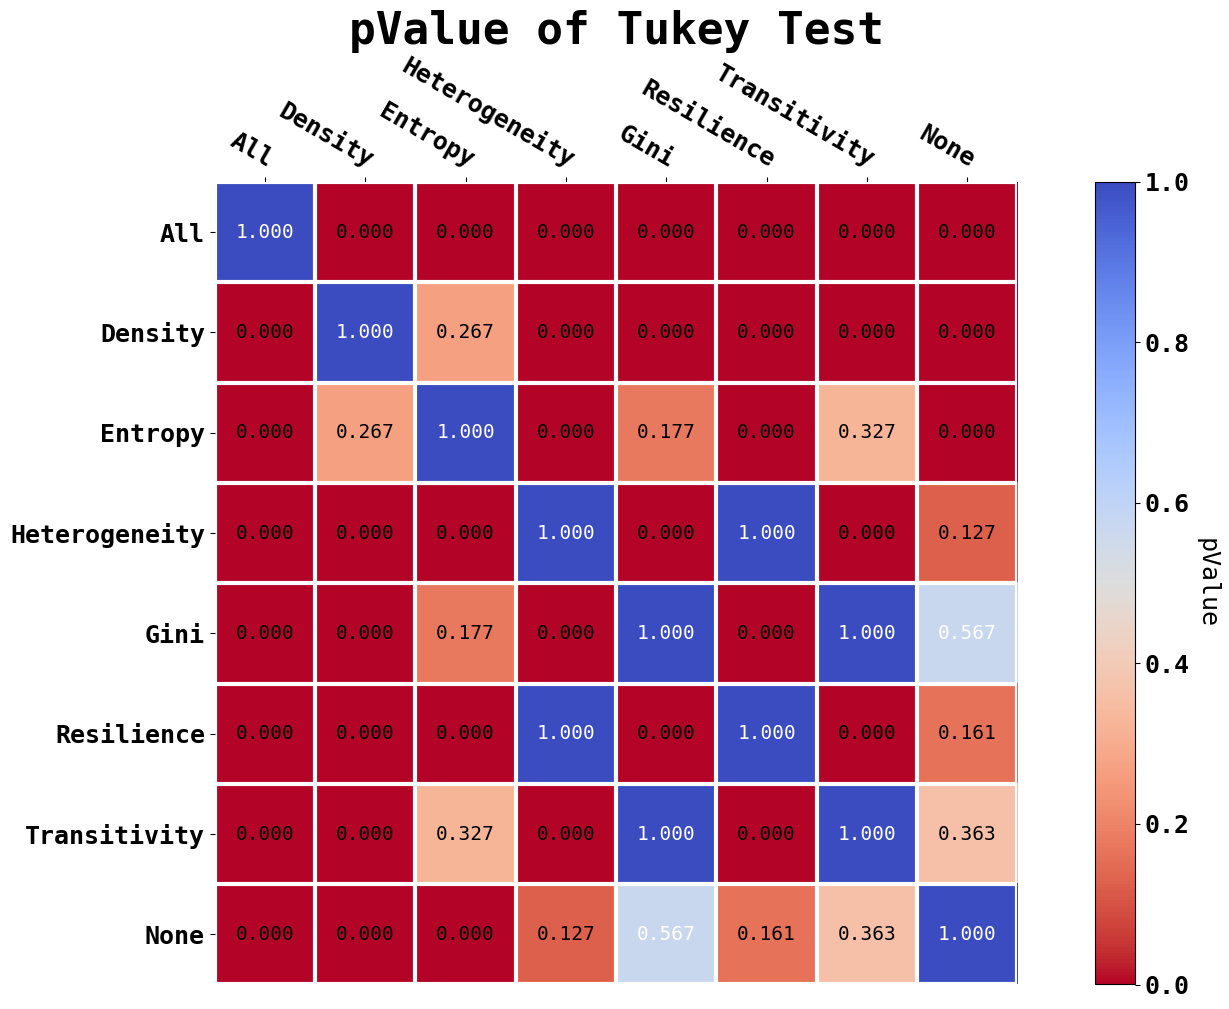

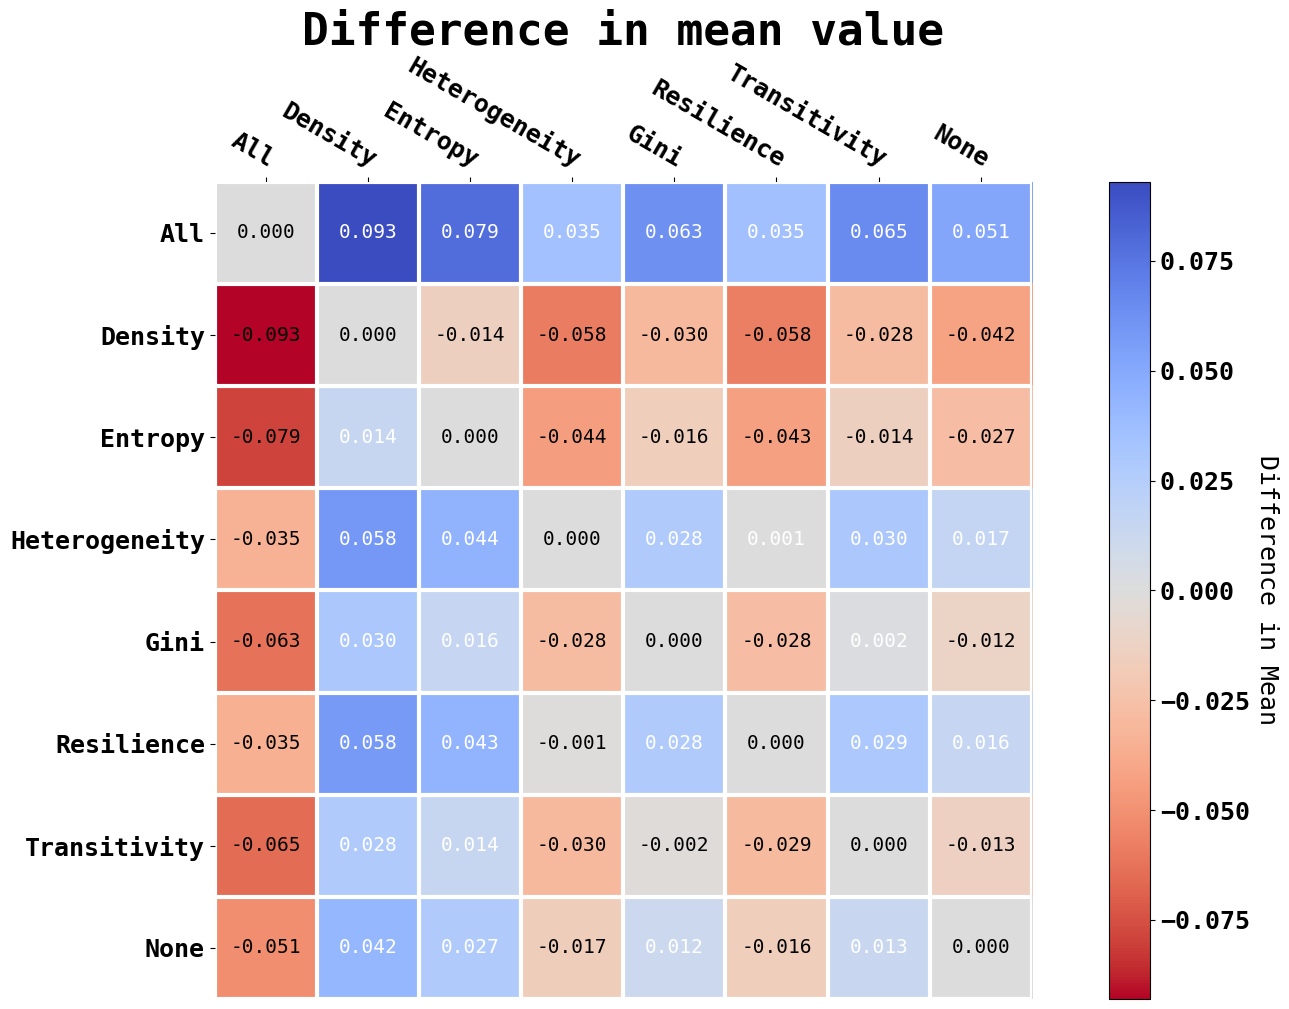

In [14]:
import numpy as np
from scipy.stats import f_oneway, tukey_hsd
import matplotlib.pyplot as plt 
#model = ['ba','mix', 'finder','ci']
model_name = ['All', 'Density_sw', 'Entropy_sw', 'Heterogeneity_sw','Gini_sw','Resilience_sw', 'Transitivity_sw', 'None_sw']
#The null hypothesis is that each group has the same mean.
All, Density, Entropy, Heterogeneity, Gini, Resilience, Transitivity, none = [],[],[],[],[],[],[],[]
for graphType in ['result_Syn' ]:
    for evalType in result["sw"][graphType]:
        for graph in result['sw'][graphType][evalType]:
            All += result['sw'][graphType][evalType][graph]['auc'] 
            Density += result['Density_sw'][graphType][evalType][graph]['auc'] 
            Entropy += result['Entropy_sw'][graphType][evalType][graph]['auc'] 
            Heterogeneity += result['Heterogeneity_sw'][graphType][evalType][graph]['auc'] 
            Gini += result['Gini_sw'][graphType][evalType][graph]['auc'] 
            Resilience += result['Resilience_sw'][graphType][evalType][graph]['auc'] 
            Transitivity += result['Transitivity_sw'][graphType][evalType][graph]['auc'] 
            none += result['None_sw'][graphType][evalType][graph]['auc'] 
    tukey_results = tukey_hsd(All, Density, Entropy, Heterogeneity, Gini, Resilience, Transitivity, none)
    #printTest(tukey_results)
    harvest_pvalue = tukey_results.pvalue
    harvest_stats = tukey_results.statistic
    filename= "./Figure/BoxPlots/HeatMap/HeatMap_SW"
    model_name = [m.split("_")[0] for m in model_name]
    create_csv(harvest_pvalue,harvest_stats, model_name,filename)
    fig, ax = plt.subplots(figsize=(16, 10), dpi=100)
    harvest = tukey_results.pvalue
    model_name = [m.split("_")[0] for m in model_name]
    im, cbar = heatmap(harvest, model_name, model_name, ax=ax,
                       cmap='coolwarm_r', cbarlabel="pValue")
    texts = annotate_heatmap(im, valfmt="{x:.3f}",fontsize = 14,fontweight ='normal')
    fig.tight_layout()
    plt.title("pValue of Tukey Test", fontsize=32, fontweight ='bold')
    plt.savefig("./Figure/BoxPlots/HeatMap/MinMax_SW_pValue.png", bbox_inches='tight', pad_inches=0.1)
    plt.show()
    fig, ax = plt.subplots(figsize=(16, 10), dpi=100)
    harvest = tukey_results.statistic
    model_name = [m.split("_")[0] for m in model_name]
    im, cbar = heatmap(harvest, model_name, model_name, ax=ax,
                       cmap='coolwarm_r', cbarlabel="Difference in Mean")
    texts = annotate_heatmap(im, valfmt="{x:.3f}",fontsize = 14, fontweight ='normal')
    fig.tight_layout()
    plt.title("Difference in mean value", fontsize=32, fontweight ='bold')
    plt.savefig("./Figure/BoxPlots/HeatMap/MinMax_SW_mean.png", bbox_inches='tight', pad_inches=0.1)
    plt.show()


## MIX

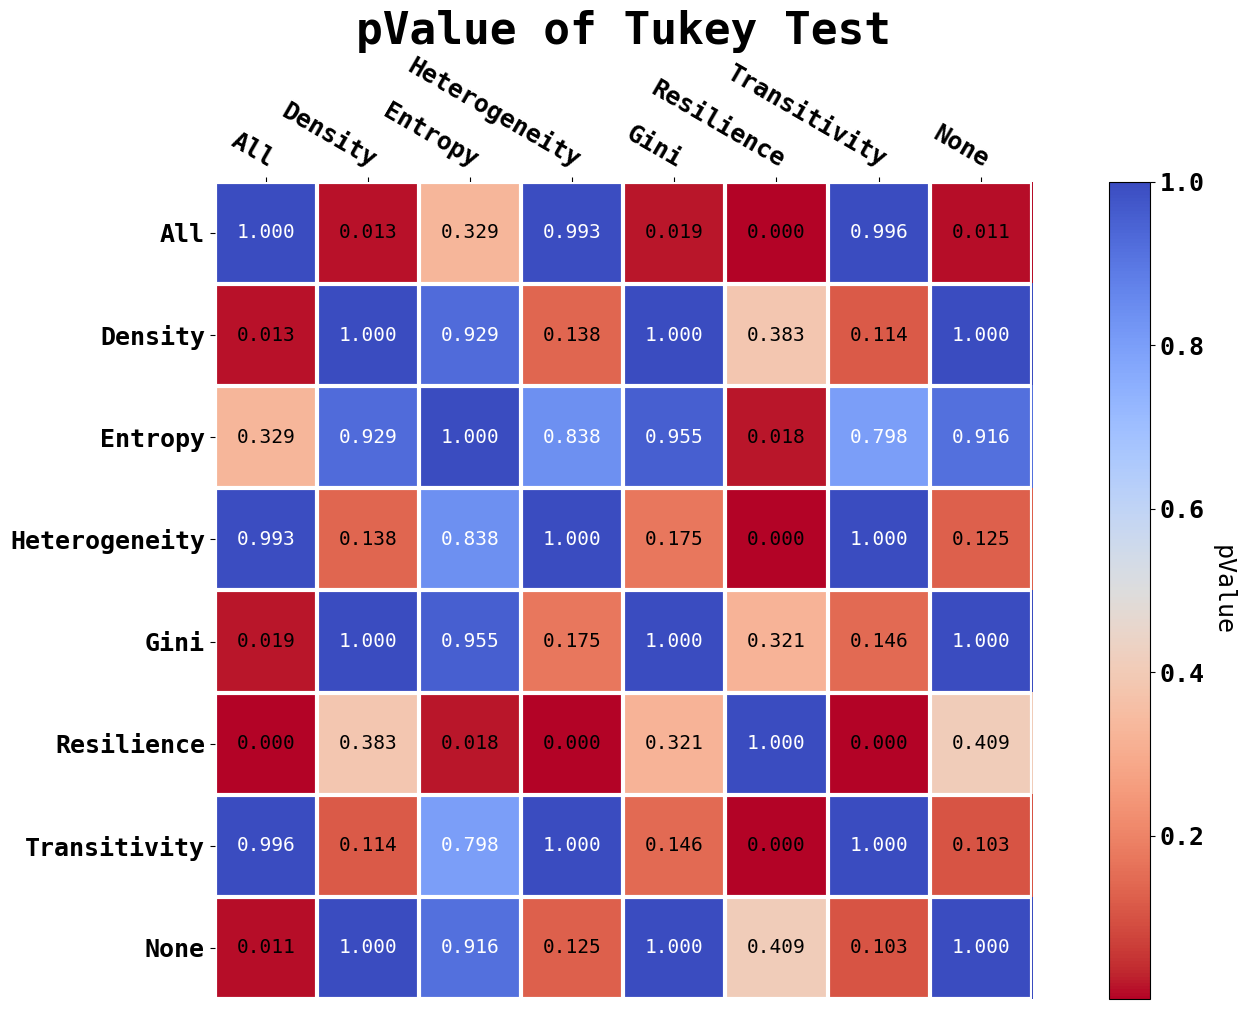

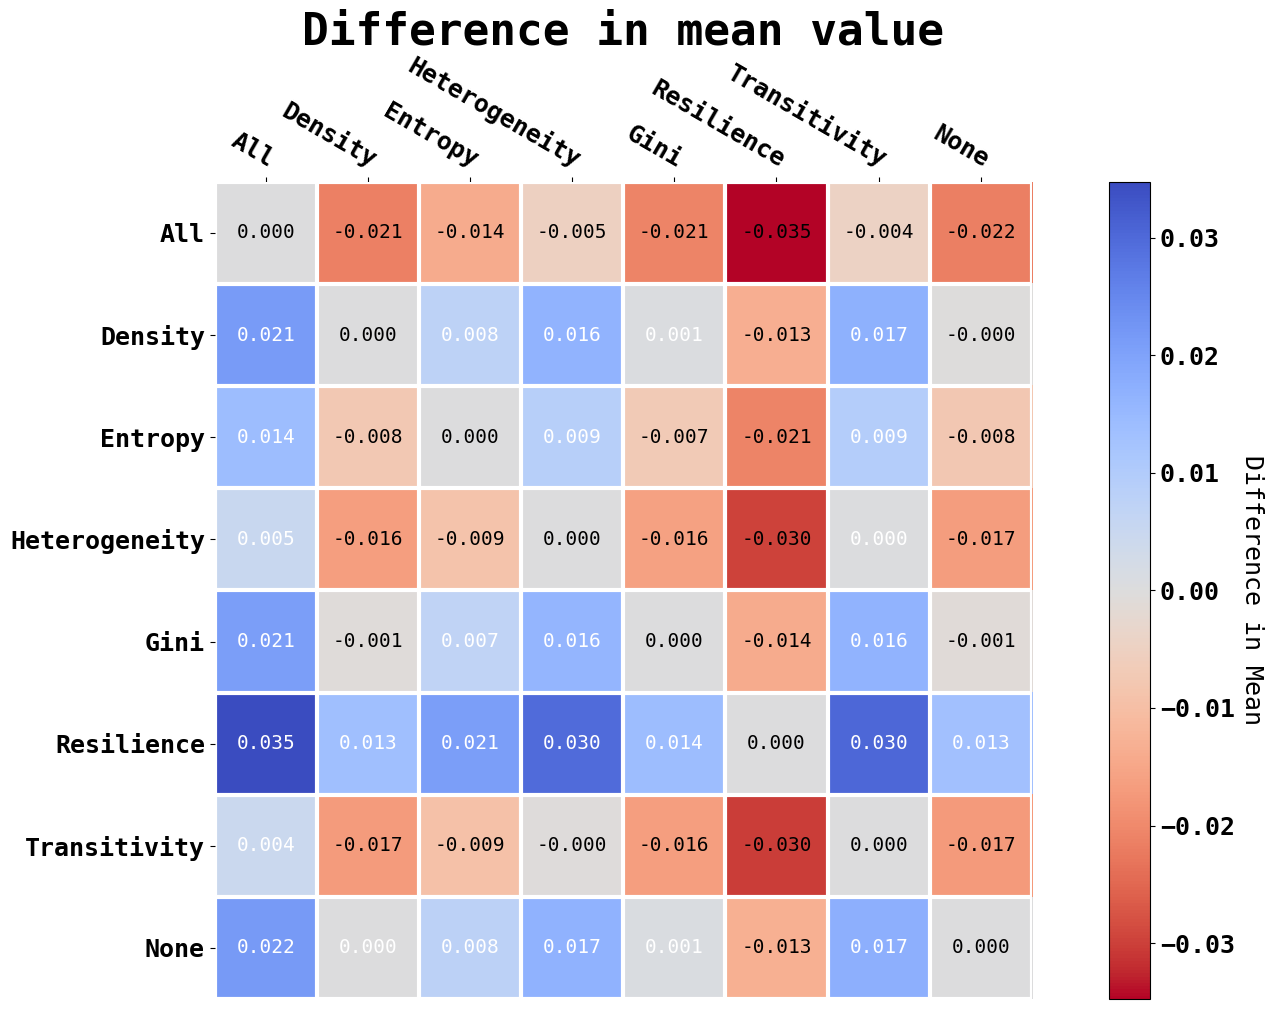

In [15]:
import numpy as np
from scipy.stats import f_oneway, tukey_hsd
import matplotlib.pyplot as plt 
#model = ['ba','mix', 'finder','ci']
model_name = ['All', 'Density_mix', 'Entropy_mix', 'Heterogeneity_mix','Gini_mix','Resilience_mix', 'Transitivity_mix', 'None_mix']
#The null hypothesis is that each group has the same mean.
All, Density, Entropy, Heterogeneity, Gini, Resilience, Transitivity, none = [],[],[],[],[],[],[],[]
for graphType in ['result_Syn' ]:
    for evalType in result["mix"][graphType]:
        for graph in result['mix'][graphType][evalType]:
            All += result['mix'][graphType][evalType][graph]['auc'] 
            Density += result['Density_mix'][graphType][evalType][graph]['auc'] 
            Entropy += result['Entropy_mix'][graphType][evalType][graph]['auc'] 
            Heterogeneity += result['Heterogeneity_mix'][graphType][evalType][graph]['auc'] 
            Gini += result['Gini_mix'][graphType][evalType][graph]['auc'] 
            Resilience += result['Resilience_mix'][graphType][evalType][graph]['auc'] 
            Transitivity += result['Transitivity_mix'][graphType][evalType][graph]['auc'] 
            none += result['None_mix'][graphType][evalType][graph]['auc'] 
    tukey_results = tukey_hsd(All, Density, Entropy, Heterogeneity, Gini, Resilience, Transitivity, none)
    #printTest(tukey_results)
    harvest_pvalue = tukey_results.pvalue
    harvest_stats = tukey_results.statistic
    filename= "./Figure/BoxPlots/HeatMap/HeatMap_Mix"
    model_name = [m.split("_")[0] for m in model_name]
    create_csv(harvest_pvalue,harvest_stats, model_name,filename)
    fig, ax = plt.subplots(figsize=(16, 10), dpi=100)
    harvest = tukey_results.pvalue
    model_name = [m.split("_")[0] for m in model_name]
    im, cbar = heatmap(harvest, model_name, model_name, ax=ax,
                       cmap='coolwarm_r', cbarlabel="pValue")
    texts = annotate_heatmap(im, valfmt="{x:.3f}",fontsize = 14,fontweight ='normal')
    fig.tight_layout()
    plt.title("pValue of Tukey Test", fontsize=32, fontweight ='bold')
    plt.savefig("./Figure/BoxPlots/HeatMap/MinMax_Mix_pValue.png", bbox_inches='tight', pad_inches=0.1)
    plt.show()
    fig, ax = plt.subplots(figsize=(16, 10), dpi=100)
    harvest = tukey_results.statistic
    model_name = [m.split("_")[0] for m in model_name]
    im, cbar = heatmap(harvest, model_name, model_name, ax=ax,
                       cmap='coolwarm_r', cbarlabel="Difference in Mean")
    texts = annotate_heatmap(im, valfmt="{x:.3f}",fontsize = 14, fontweight ='normal')
    fig.tight_layout()
    plt.title("Difference in mean value", fontsize=32, fontweight ='bold')
    plt.savefig("./Figure/BoxPlots/HeatMap/MinMax_Mix_mean.png", bbox_inches='tight', pad_inches=0.1)
    plt.show()
